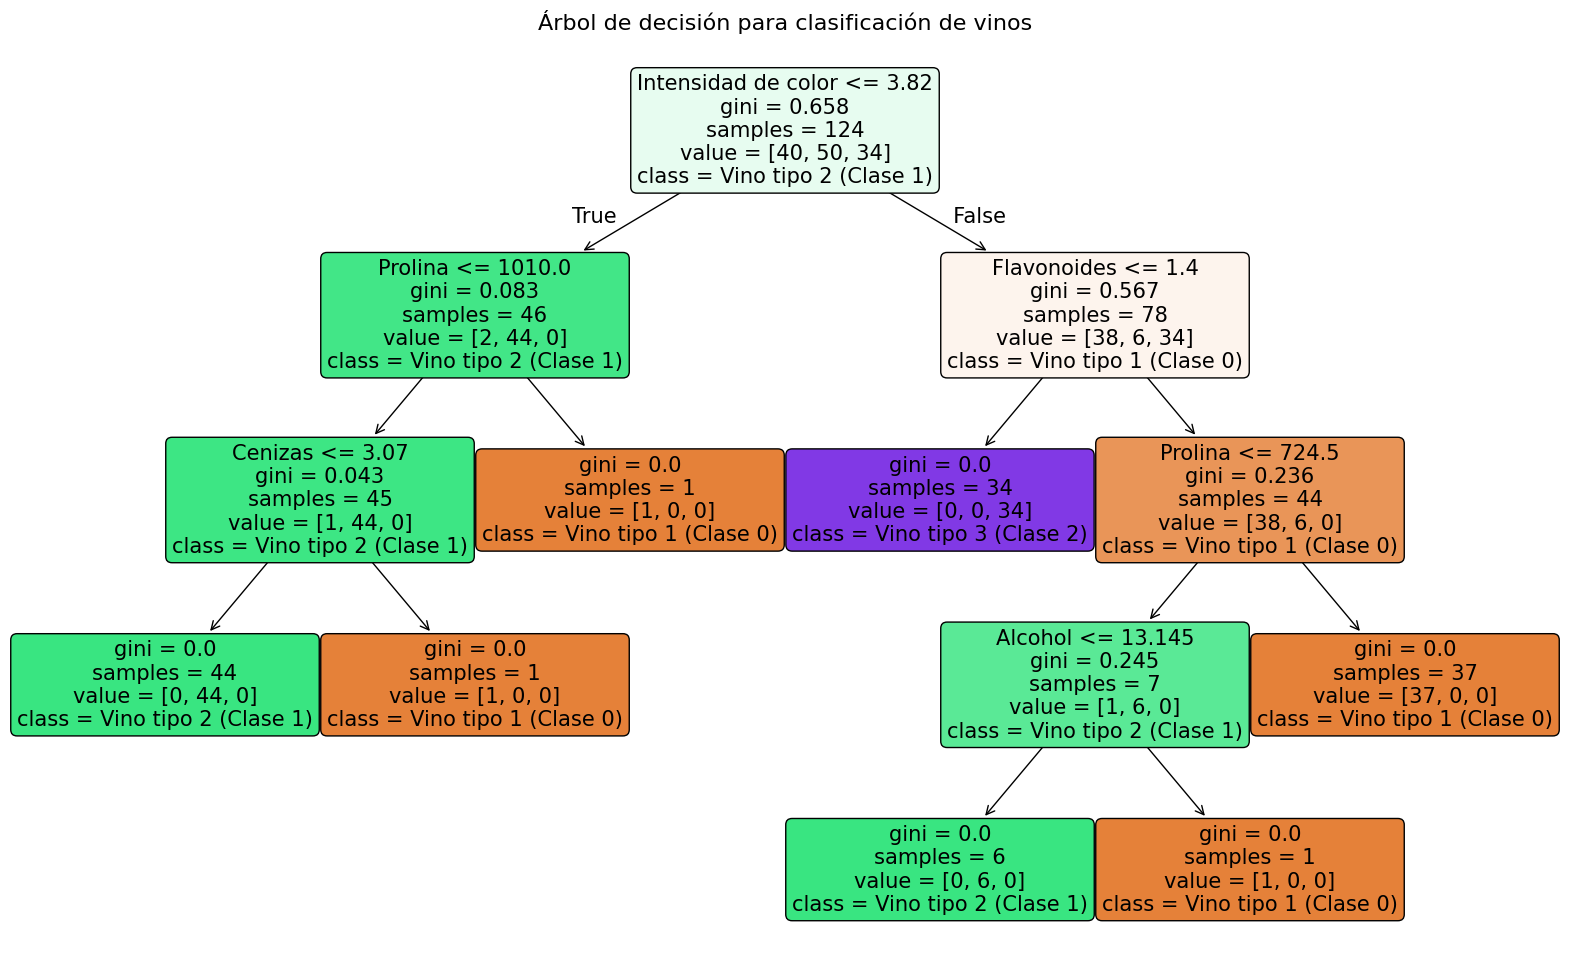

Importancia de cada variable química en la clasificación:
Flavonoides                      0.414659
Intensidad de color              0.411475
Prolina                          0.128900
Cenizas                          0.023961
Alcohol                          0.021005
Magnesio                         0.000000
Alcalinidad de las cenizas       0.000000
Ácido málico                     0.000000
Fenoles totales                  0.000000
Proantocianinas                  0.000000
Fenoles no flavonoides           0.000000
Tono de color                    0.000000
OD280/OD315 de vinos diluidos    0.000000
dtype: float64
Precisión del modelo en el conjunto de prueba: 0.96
Características químicas del vino ejemplo: [1.364e+01 3.100e+00 2.560e+00 1.520e+01 1.160e+02 2.700e+00 3.030e+00
 1.700e-01 1.660e+00 5.100e+00 9.600e-01 3.360e+00 8.450e+02]
Predicción de clase para el ejemplo: Vino tipo 1 (Clase 0)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [2]:
# Clasificación de Vinos con Árbol de Decisión

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# 1. Cargar el dataset de vinos
wine = load_wine()
caracteristicas_es = [
    "Alcohol",
    "Ácido málico",
    "Cenizas",
    "Alcalinidad de las cenizas",
    "Magnesio",
    "Fenoles totales",
    "Flavonoides",
    "Fenoles no flavonoides",
    "Proantocianinas",
    "Intensidad de color",
    "Tono de color",
    "OD280/OD315 de vinos diluidos",
    "Prolina"
]
clases_es = ["Vino tipo 1 (Clase 0)", "Vino tipo 2 (Clase 1)", "Vino tipo 3 (Clase 2)"]

X = pd.DataFrame(wine.data, columns=caracteristicas_es)
y = wine.target

# 2. División de los datos (entrenamiento: 70%, prueba: 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Entrenamiento del árbol de decisión (máxima profundidad 4)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# 4. Visualización del árbol
plt.figure(figsize=(20,12))
tree.plot_tree(clf, feature_names=caracteristicas_es, class_names=clases_es, filled=True, rounded=True)
plt.title("Árbol de decisión para clasificación de vinos", fontsize=16)
plt.show()

# 5. Importancia de cada característica química
importancia = pd.Series(clf.feature_importances_, index=caracteristicas_es)
print("Importancia de cada variable química en la clasificación:")
print(importancia.sort_values(ascending=False))

# 6. Evaluación del modelo: precisión en conjunto de prueba
y_pred = clf.predict(X_test)
precision = metrics.accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {precision:.2f}")

# 7. Ejemplo de predicción con un vino del conjunto de prueba
ejemplo = X_test.iloc[0].values
print("Características químicas del vino ejemplo:", ejemplo)
pred = clf.predict([ejemplo])
print(f"Predicción de clase para el ejemplo: {clases_es[pred[0]]}")
